In [4]:
!pip install matplotlib pandas seaborn jupyter openpyxl

  Using cached et_xmlfile-1.1.0-py3-none-any.whl.metadata (1.8 kB)
  Using cached overrides-7.7.0-py3-none-any.whl.metadata (5.8 kB)
  Using cached websocket_client-1.8.0-py3-none-any.whl.metadata (8.0 kB)
  Using cached pycparser-2.22-py3-none-any.whl.metadata (943 bytes)
   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   ---------------------------------------- 294.9/294.9 kB 9.2 MB/s eta 0:00:00
   ---------------------------------------- 0.0/250.9 kB ? eta -:--:--
   --------------------------------------- 250.9/250.9 kB 16.0 MB/s eta 0:00:00
Using cached et_xmlfile-1.1.0-py3-none-any.whl (4.7 kB)
   ---------------------------------------- 0.0/139.8 kB ? eta -:--:--
   ---------------------------------------- 139.8/139.8 kB 8.1 MB/s eta 0:00:00
   ---------------------------------------- 0.0/11.6 MB ? eta -:--:--
   ----- ---------------------------------- 1.6/11.6 MB 25.8 MB/s eta 0:00:01
   --------- ------------------------------ 2.7/11.6 MB 28.3 MB/s eta


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: C:\Users\parth\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [45]:
import os
from dotenv import load_dotenv

# Load environment variables from .env file
load_dotenv()

# Get dataset path
dataset_path = os.getenv("DATASET_PATH")

In [46]:
df = pd.read_excel(dataset_path)

# Display the first few rows
df.head()

,Product ID,Product Name,Segment,Category,Sub-Category,Order ID,Customer ID,Customer Name,Purchase Date,PaymentMode,Country,Region,Order Status,Sales,Quantity,Discount,Profit
0,10001337,Carina Dou,Consumer,Furniture,Bookcases,AA12218,614,Valerie Koch,2019-12-02,COD,Mexico,Central,Delivered,45.480,3,0.00,20.9208
1,10001519,Vinyl Sect,Consumer,Furniture,Chairs,AA12821,1820,Joy Mercer,2018-10-13,Debit Card,USA,West,Delivered,279.900,5,0.00,137.1510
2,10001601,Xerox 1898,Corporate,Office Supplies,Labels,AA13231,2640,Connie Mccarthy,2022-11-20,Debit Card,Mexico,West,Shipped,15.240,5,0.20,5.1435
3,10001619,#10- 4 1/8,Consumer,Furniture,Tables,AA12532,878,Jerry Mooney,2021-06-22,Debit Card,Canada,West,Delivered,22.050,7,0.00,10.5840
4,10001798,Acco Banke,Consumer,Office Supplies,Storage,AA12370,918,Marie Dominguez,2019-03-09,Debit Card,Mexico,South,Delivered,514.165,5,0.15,-30.2450


In [11]:
# Check the DataFrame info
df.info()

# Check for missing values
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1330 entries, 0 to 1329
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Product ID     1330 non-null   int64         
 1   Product Name   1330 non-null   object        
 2   Segment        1330 non-null   object        
 3   Category       1330 non-null   object        
 4   Sub-Category   1330 non-null   object        
 5   Order ID       1330 non-null   object        
 6   Customer ID    1330 non-null   int64         
 7   Customer Name  1330 non-null   object        
 8   Purchase Date  1330 non-null   datetime64[ns]
 9   PaymentMode    1330 non-null   object        
 10  Country        1330 non-null   object        
 11  Region         1330 non-null   object        
 12  Order Status   1330 non-null   object        
 13  Sales          1330 non-null   float64       
 14  Quantity       1330 non-null   int64         
 15  Discount       1330 n

Product ID       0
Product Name     0
Segment          0
Category         0
Sub-Category     0
Order ID         0
Customer ID      0
Customer Name    0
Purchase Date    0
PaymentMode      0
Country          0
Region           0
Order Status     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [12]:
# Convert 'Purchase Date' to datetime
df['Purchase Date'] = pd.to_datetime(df['Purchase Date'])

# Drop duplicates
df.drop_duplicates(inplace=True)

# Handle missing values (if any)
# For example, drop rows with missing values
df.dropna(inplace=True)


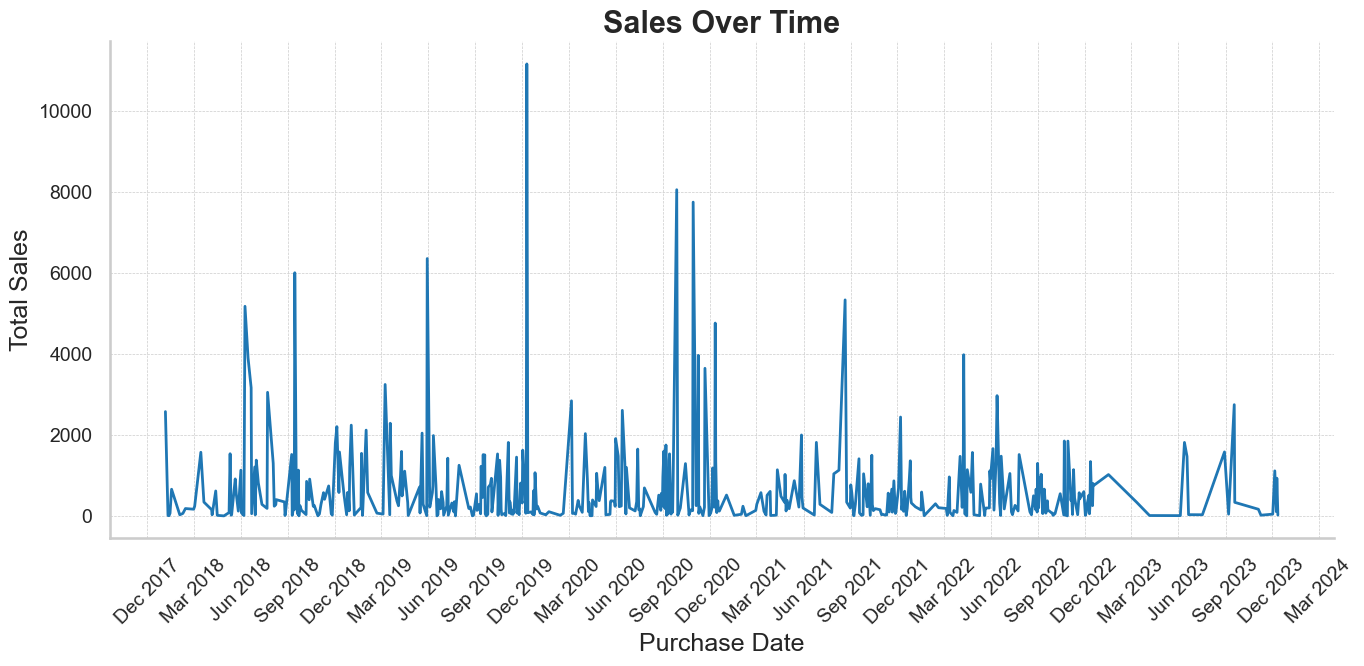

In [38]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Aggregate sales over time
sales_over_time = df.groupby('Purchase Date')['Sales'].sum().reset_index()

# Set the figure size and style
plt.figure(figsize=(14, 7), dpi=100)
sns.set_style('whitegrid')
sns.set_palette('colorblind')

# Plot the sales over time
plt.plot(sales_over_time['Purchase Date'], sales_over_time['Sales'], linewidth=2, color='#1f77b4')

# Format the x-axis for dates
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
plt.xticks(rotation=45)

# Add labels and title
plt.title('Sales Over Time', fontsize=22, fontweight='bold')
plt.xlabel('Purchase Date', fontsize=18)
plt.ylabel('Total Sales', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Add gridlines
plt.grid(visible=True, which='major', linestyle='--', linewidth=0.5)

# Remove top and right spines
sns.despine()

# Show the plot
plt.savefig('sales_over_time.png', dpi=300, bbox_inches='tight')
plt.tight_layout()
plt.show()


C:\Users\parth\AppData\Local\Temp\ipykernel_28652\2425656757.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Category', y='Sales', data=category_sales, palette='pastel')


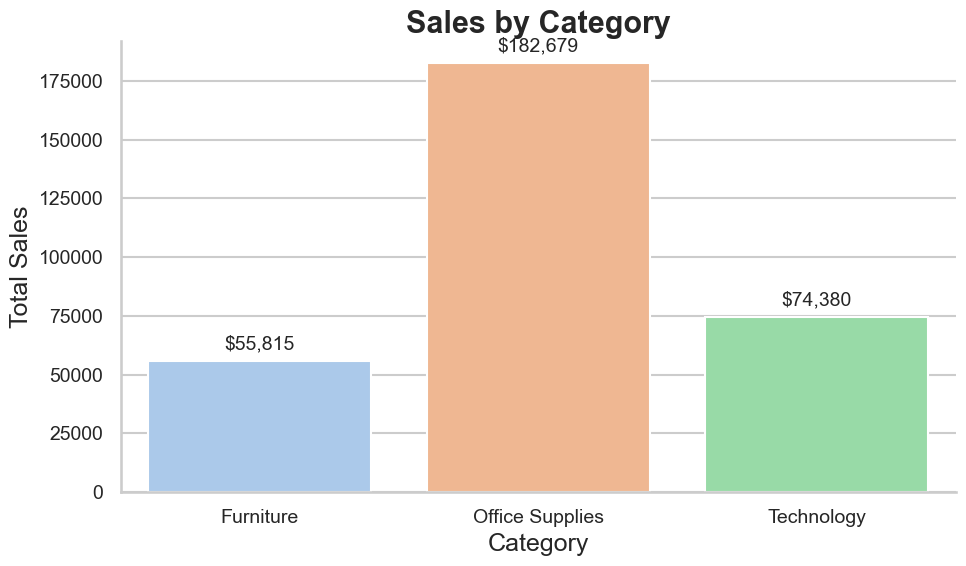

In [39]:
# Calculate sales by category
category_sales = df.groupby('Category')['Sales'].sum().reset_index()

# Set figure size
plt.figure(figsize=(10, 6), dpi=100)

# Create barplot
sns.barplot(x='Category', y='Sales', data=category_sales, palette='pastel')

# Add labels and title
plt.title('Sales by Category', fontsize=22, fontweight='bold')
plt.xlabel('Category', fontsize=18)
plt.ylabel('Total Sales', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Annotate bars
for index, row in category_sales.iterrows():
    plt.text(index, row['Sales'] + 5000, f"${row['Sales']:,.0f}", ha='center', fontsize=14)

# Remove spines
sns.despine()

# Show plot
plt.savefig('sales_by_category.png', dpi=300, bbox_inches='tight')
plt.tight_layout()
plt.show()


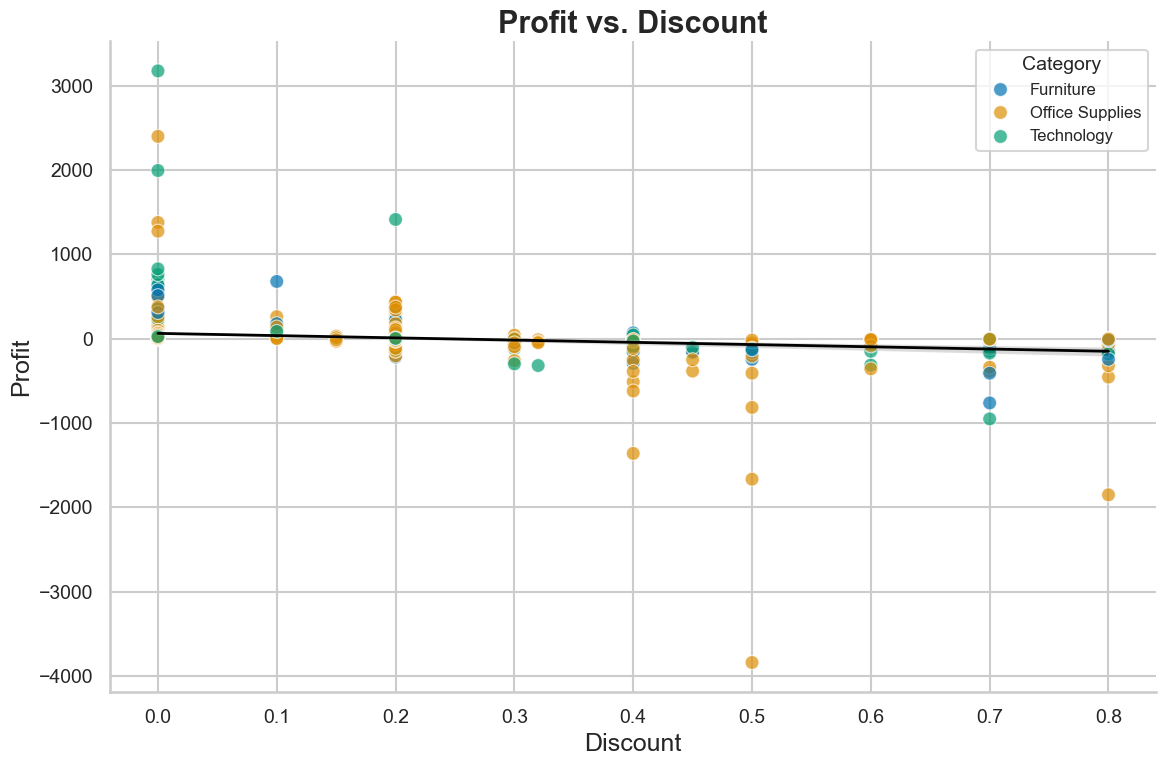

In [40]:
# Set figure size
plt.figure(figsize=(12, 8), dpi=100)

# Create scatter plot
sns.scatterplot(x='Discount', y='Profit', data=df, hue='Category', alpha=0.7, edgecolor='w', s=100)

# Add regression line
sns.regplot(x='Discount', y='Profit', data=df, scatter=False, color='black', line_kws={'linewidth':2})

# Add labels and title
plt.title('Profit vs. Discount', fontsize=22, fontweight='bold')
plt.xlabel('Discount', fontsize=18)
plt.ylabel('Profit', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Add legend
plt.legend(title='Category', fontsize=12, title_fontsize=14)

# Remove spines
sns.despine()

# Show plot
plt.savefig('profit_discount_ratio.png', dpi=300, bbox_inches='tight')
plt.tight_layout()
plt.show()


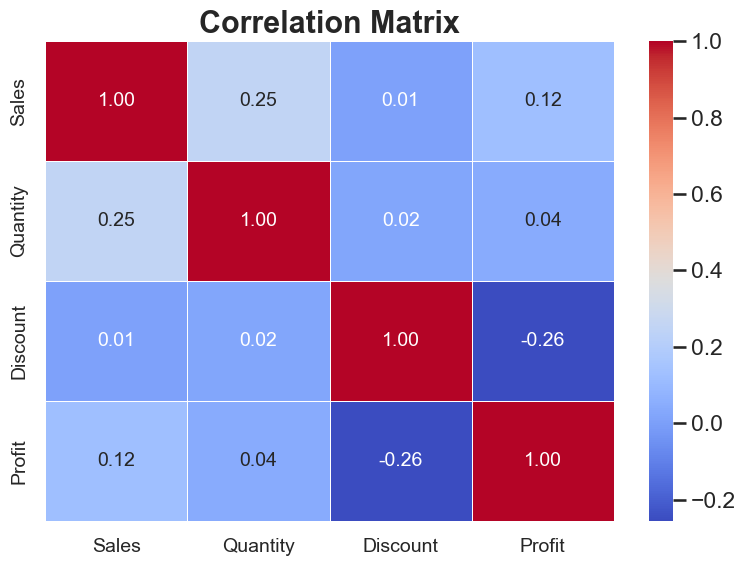

In [44]:
# Calculate correlation
corr = df[['Sales', 'Quantity', 'Discount', 'Profit']].corr()

# Set figure size
plt.figure(figsize=(8, 6), dpi=100)

# Create heatmap
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', annot_kws={"size":14}, linewidths=0.5)

# Add title
plt.title('Correlation Matrix', fontsize=22, fontweight='bold')

# Adjust ticks
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Show plot
plt.savefig('correlation_matrix.png', dpi=300, bbox_inches='tight')
plt.tight_layout()
plt.show()


C:\Users\parth\AppData\Local\Temp\ipykernel_28652\3875811655.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Sales', y='Region', data=region_sales, palette='magma')


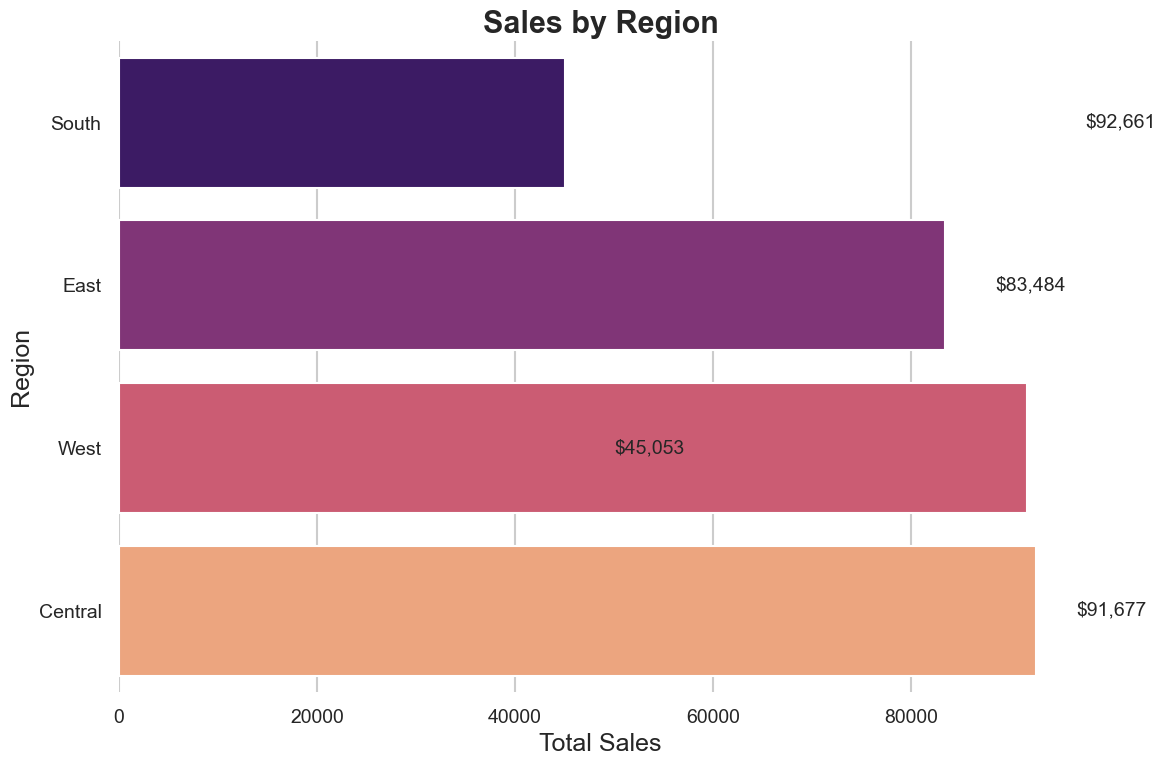

In [41]:
# Calculate sales by region
region_sales = df.groupby('Region')['Sales'].sum().reset_index().sort_values('Sales', ascending=True)

# Set figure size
plt.figure(figsize=(12, 8), dpi=100)

# Create horizontal barplot
sns.barplot(x='Sales', y='Region', data=region_sales, palette='magma')

# Add labels and title
plt.title('Sales by Region', fontsize=22, fontweight='bold')
plt.xlabel('Total Sales', fontsize=18)
plt.ylabel('Region', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Annotate bars
for index, row in region_sales.iterrows():
    plt.text(row['Sales'] + 5000, index, f"${row['Sales']:,.0f}", va='center', fontsize=14)

# Remove spines
sns.despine(left=True, bottom=True)

# Show plot
plt.savefig('sales_by_region.png', dpi=300, bbox_inches='tight')
plt.tight_layout()
plt.show()


C:\Users\parth\AppData\Local\Temp\ipykernel_28652\4235376805.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Category', y='Profit Margin', data=margin_by_category, palette='Set2')


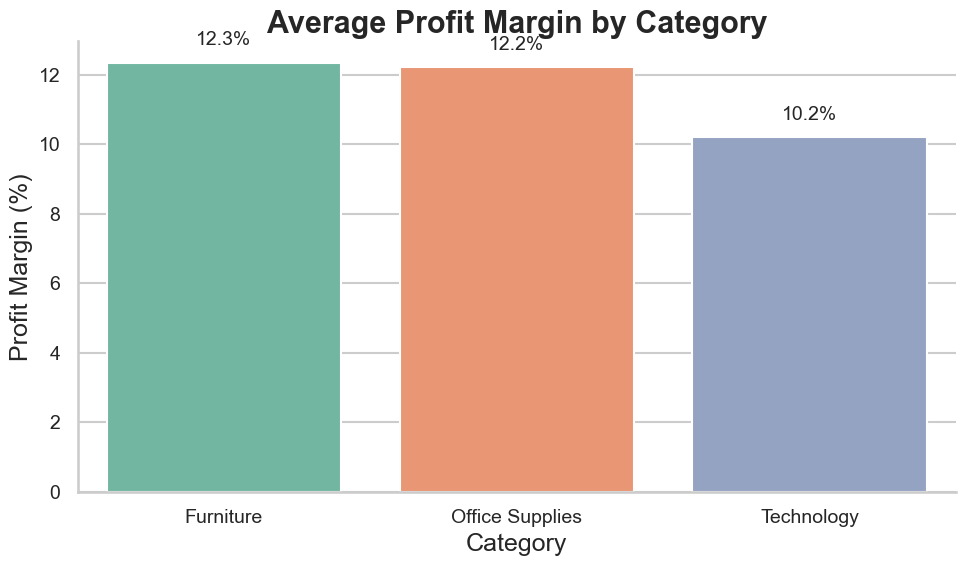

In [43]:
# Calculate profit margin
df['Profit Margin'] = (df['Profit'] / df['Sales']) * 100

# Average profit margin by category
margin_by_category = df.groupby('Category')['Profit Margin'].mean().reset_index()

# Plot
plt.figure(figsize=(10, 6), dpi=100)
sns.barplot(x='Category', y='Profit Margin', data=margin_by_category, palette='Set2')

# Formatting
plt.title('Average Profit Margin by Category', fontsize=22, fontweight='bold')
plt.xlabel('Category', fontsize=18)
plt.ylabel('Profit Margin (%)', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Annotate bars
for index, row in margin_by_category.iterrows():
    plt.text(index, row['Profit Margin'] + 0.5, f"{row['Profit Margin']:.1f}%", ha='center', fontsize=14)

sns.despine()
plt.savefig('avg_profit_by_category.png', dpi=300, bbox_inches='tight')
plt.tight_layout()
plt.show()


C:\Users\parth\AppData\Local\Temp\ipykernel_28652\316808170.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = df.set_index('Purchase Date').resample('M')['Sales'].sum()


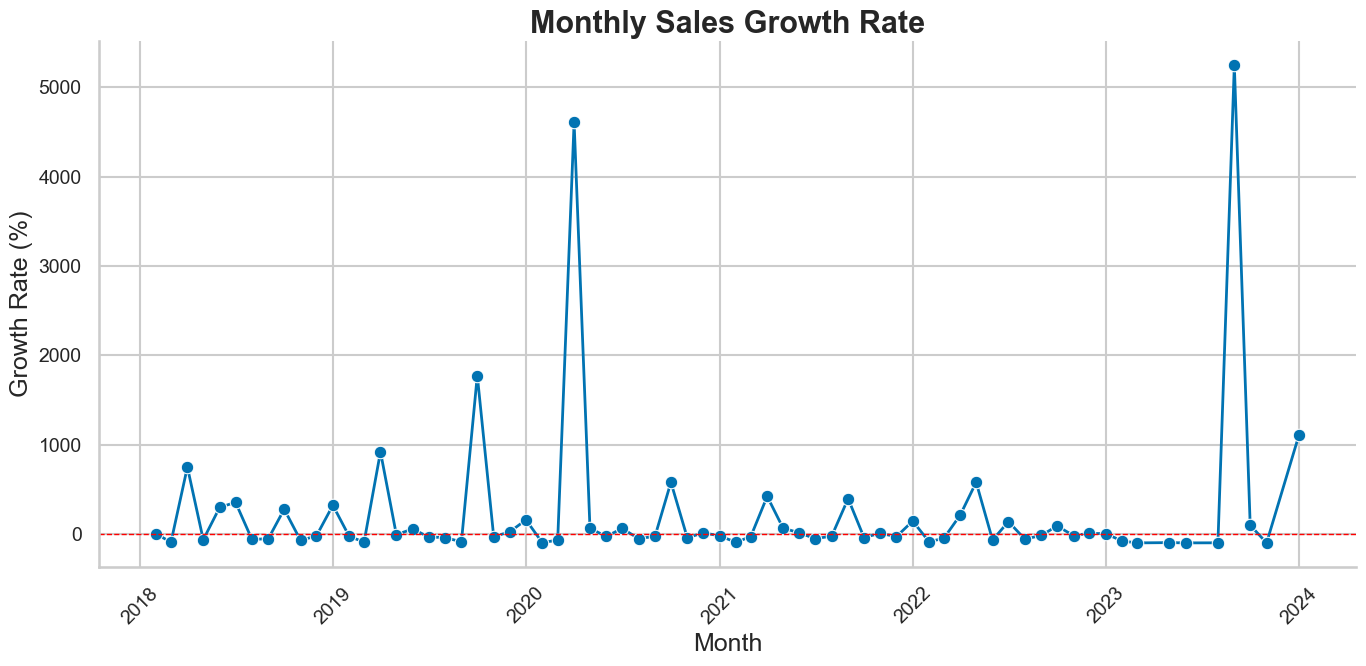

In [42]:
# Calculate monthly sales
monthly_sales = df.set_index('Purchase Date').resample('M')['Sales'].sum()

# Calculate growth rate
growth_rate = monthly_sales.pct_change().fillna(0) * 100

# Plot
plt.figure(figsize=(14, 7), dpi=100)
sns.lineplot(x=monthly_sales.index, y=growth_rate, marker='o', linewidth=2)

# Formatting
plt.title('Monthly Sales Growth Rate', fontsize=22, fontweight='bold')
plt.xlabel('Month', fontsize=18)
plt.ylabel('Growth Rate (%)', fontsize=18)
plt.xticks(rotation=45, fontsize=14)
plt.yticks(fontsize=14)
plt.axhline(0, color='red', linestyle='--', linewidth=1)
plt.grid(True)
sns.despine()
plt.savefig('monthly_sales_growth_rate.png', dpi=300, bbox_inches='tight')
plt.tight_layout()
plt.show()
